In [1]:
#import liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

# Train Data

In [2]:
train=pd.read_csv('train_wn75k28.csv')
pd.set_option('display.max_column',None)
train

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,39157,2021-12-31,11,11,2.0,2017-10-19,1,0,0,0,1,1,1,0,0,0,0,0,0
39157,39158,2021-12-31,3,9,3.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
39158,39159,2021-12-31,8,7,2.0,NaN,1,0,0,0,1,0,1,0,0,0,0,0,0
39159,39160,2021-12-31,7,12,2.0,NaN,0,0,0,0,0,1,0,0,0,0,1,0,0


# Checking null values

In [3]:
train.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [4]:
#percentage of null values
((train.isnull().sum()/train.isnull().count())*100)

id                       0.000000
created_at               0.000000
campaign_var_1           0.000000
campaign_var_2           0.000000
products_purchased      53.397513
signup_date             38.591966
user_activity_var_1      0.000000
user_activity_var_2      0.000000
user_activity_var_3      0.000000
user_activity_var_4      0.000000
user_activity_var_5      0.000000
user_activity_var_6      0.000000
user_activity_var_7      0.000000
user_activity_var_8      0.000000
user_activity_var_9      0.000000
user_activity_var_10     0.000000
user_activity_var_11     0.000000
user_activity_var_12     0.000000
buy                      0.000000
dtype: float64

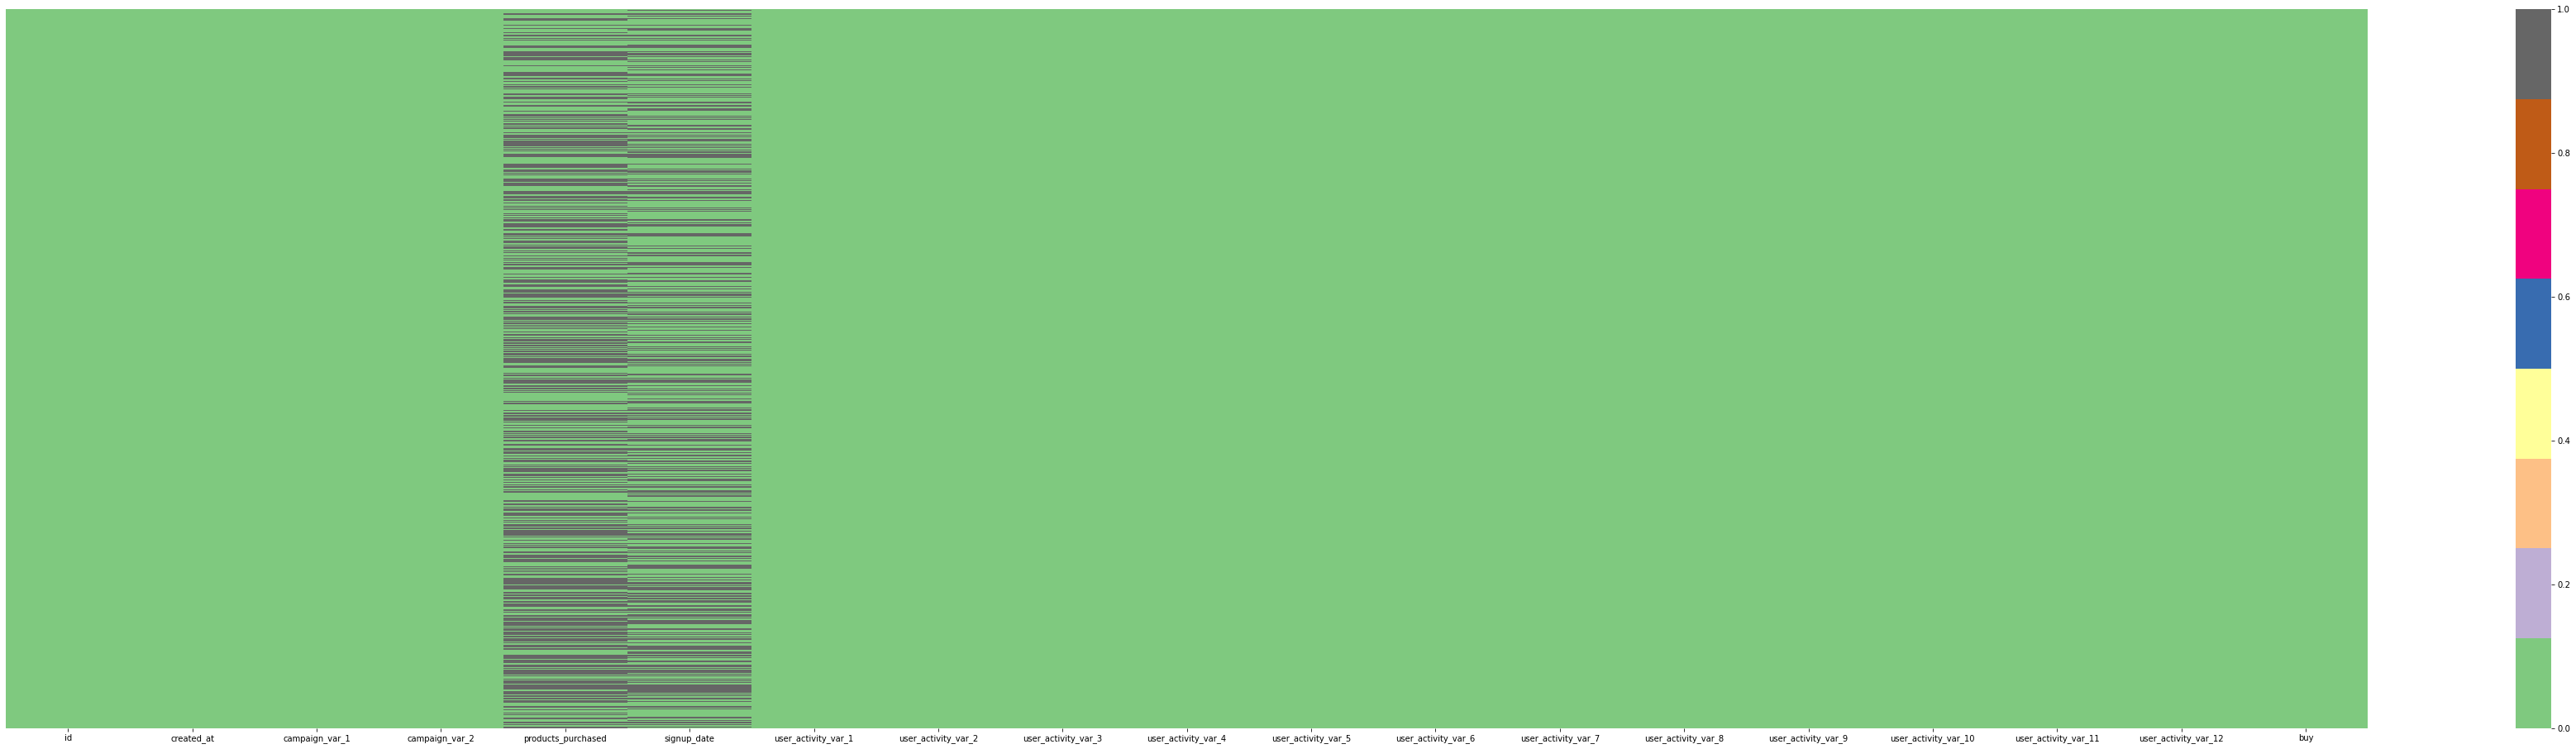

In [5]:
#figure for null values
plt.figure(figsize=(64,16))
sns.heatmap(train.isnull(),yticklabels=False,cmap='Accent')
plt.show()


# Visualize null data and filling them

C:\Users\t8sha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='products_purchased', ylabel='count'>

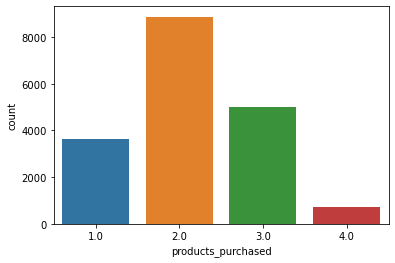

In [6]:
sns.countplot(train.products_purchased)

In [7]:
train['products_purchased']=train['products_purchased'].fillna(train.products_purchased.mean())

In [8]:
train['products_purchased']=train['products_purchased'].astype('int64')

In [9]:
train['products_purchased'].isnull().sum()

0

In [10]:
train['signup_date'].unique()

array(['2020-09-24', '2020-09-19', '2021-08-11', ..., '2018-04-30',
       '2016-12-27', '2017-10-19'], dtype=object)

In [11]:
train['signup_date'].value_counts()

2021-07-18    45
2021-08-03    38
2021-01-28    38
2021-09-10    38
2021-09-20    38
              ..
2018-11-16     1
2018-05-20     1
2017-12-08     1
2017-10-12     1
2017-10-19     1
Name: signup_date, Length: 1800, dtype: int64

In [12]:
train=train.drop('signup_date',axis=1)

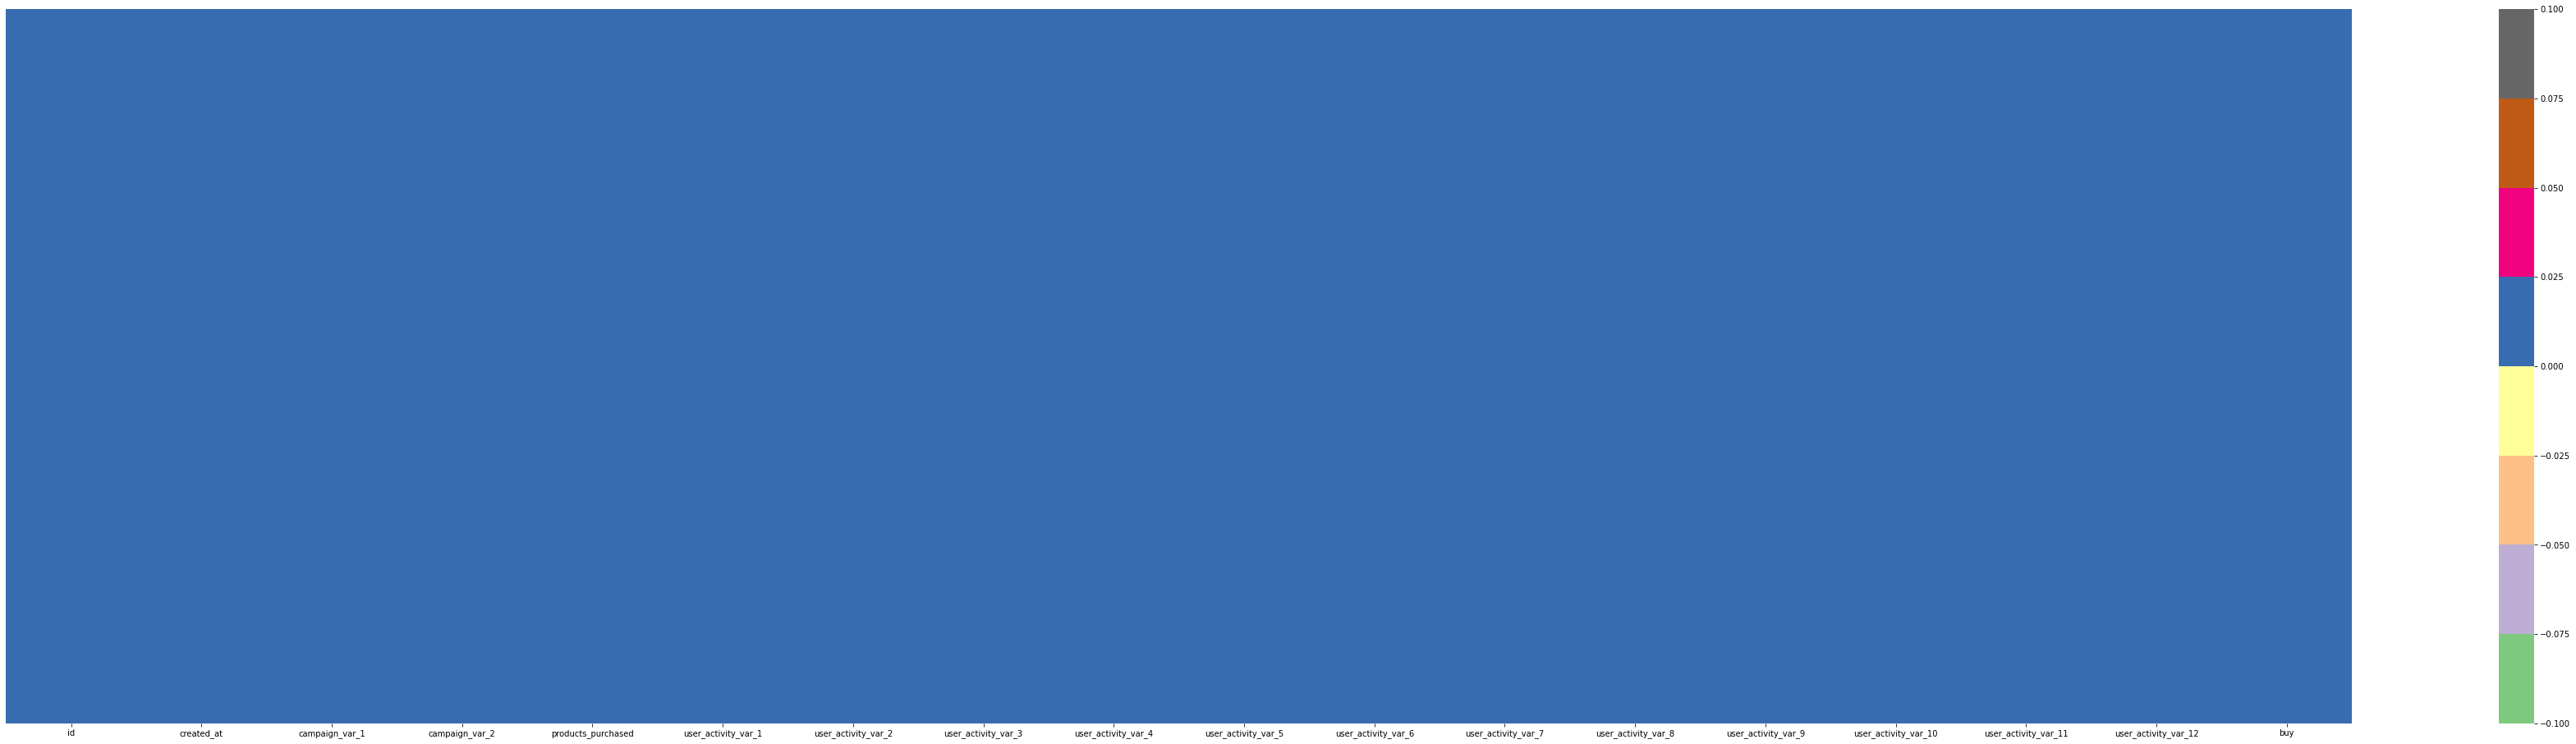

In [13]:
# this plot showing their is no null value is present
plt.figure(figsize=(64,16))
sns.heatmap(train.isnull(),yticklabels=False,cmap='Accent')
plt.show()

In [14]:
#changing format of date
train['created_at'] = pd.to_datetime(train['created_at'], format = '%Y-%m-%dT', errors = 'coerce')

In [15]:
train['created_at'].head()

0   2021-01-01
1   2021-01-01
2   2021-01-01
3   2021-01-01
4   2021-01-01
Name: created_at, dtype: datetime64[ns]

In [16]:
#maikin column of year, month,days 
train['created_at_year'] = train['created_at'].dt.year
train['created_at_month'] = train['created_at'].dt.month
train['created_at_days'] = train['created_at'].dt.day

In [17]:
train=train.drop('created_at',axis=1)

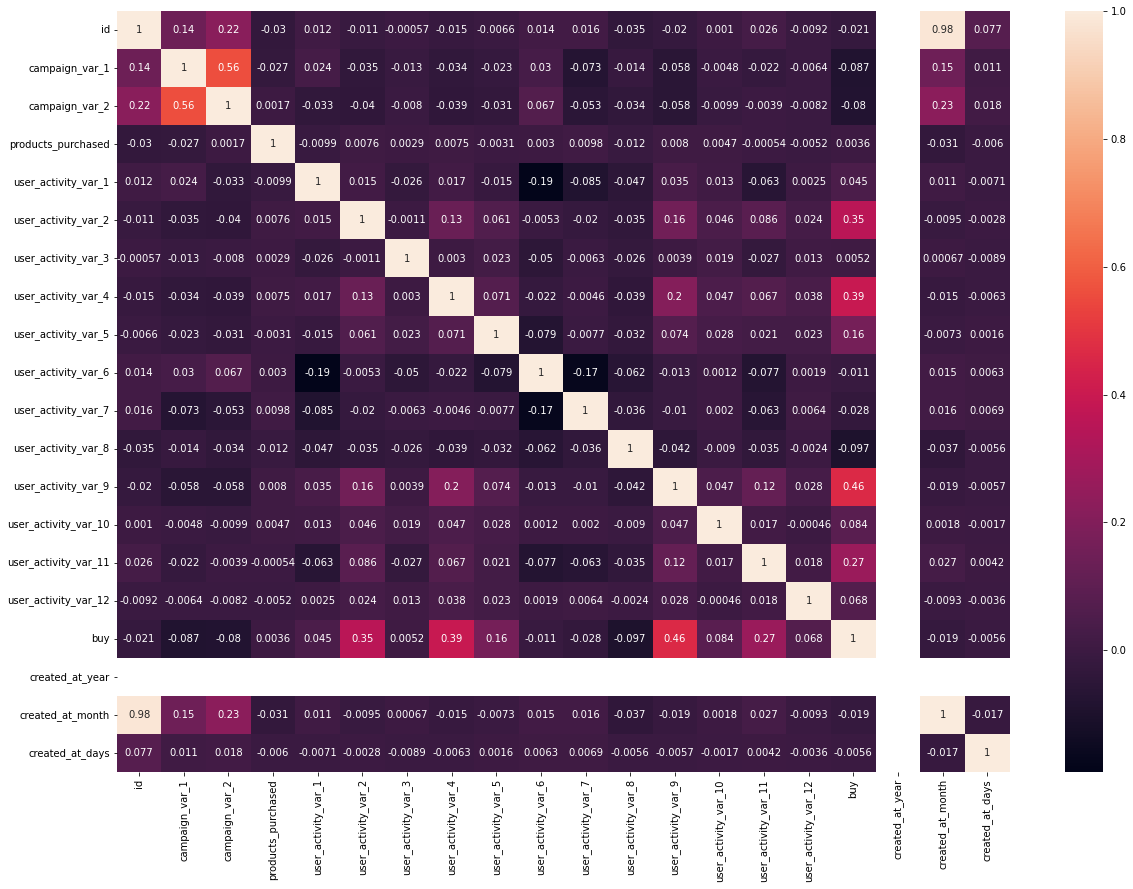

In [18]:
#checking corr through heatmap
plt.figure(figsize=(20,14))
sns.heatmap(train.corr(),annot=True,)
plt.show()

In [19]:
train.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,created_at_year,created_at_month,created_at_days
count,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.0,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.071832,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020,2021.0,7.782258,16.017773
std,11304.951283,3.472944,2.614296,0.537865,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042,0.0,3.139343,8.785966
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.0,1.000000,1.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.0,5.000000,8.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.0,8.000000,16.000000
75%,29371.000000,9.000000,8.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.0,10.000000,24.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000,2021.0,12.000000,31.000000


# checking data is imbalanced or not

In [20]:
train['buy'].value_counts()

0    37163
1     1998
Name: buy, dtype: int64

C:\Users\t8sha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='buy', ylabel='Density'>

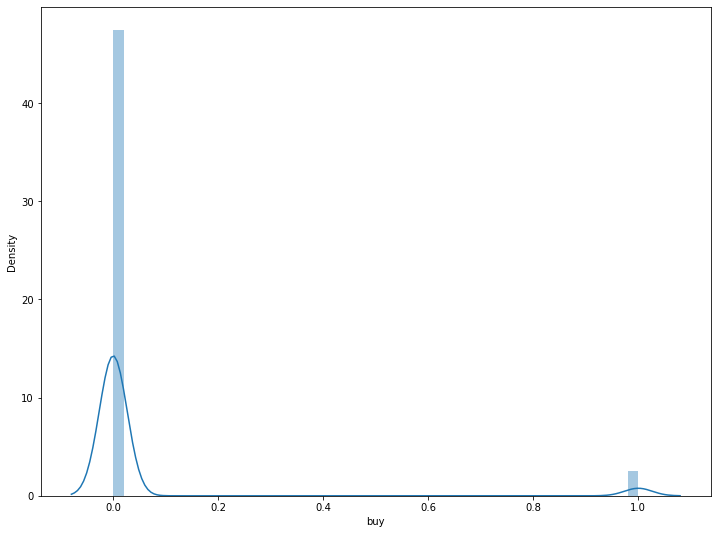

In [21]:
plt.figure(figsize = (12,9))
sns.distplot(train['buy'])

In [22]:
#upsampled MINORITY class for better prediction
import sklearn
from imblearn.over_sampling import SMOTE

In [23]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = train[(train['buy']==0)] 
df_minority = train[(train['buy']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=37000 , # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [24]:
df_upsampled['buy'].value_counts()

0    37163
1    37000
Name: buy, dtype: int64

Splitting train data into train,test for model fitting

In [25]:
X = df_upsampled.drop('buy', axis = 1)
y = df_upsampled['buy']

In [26]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 42)
eval_set=[(X_test, y_test)]

# model fitting

Train a Few Models - Finally going with random forest classifier classifier.

In [27]:
#from sklearn.linear_model import LogisticRegression
#model=LogisticRegression()

#model.fit(X_train,y_train)

#y_pred=model.predict(X_test)

#from sklearn.metrics import classification_report
#print(classification_report(y_test,y_pred))

In [28]:
'''import xgboost
xgb_reg = xgboost.sklearn.XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.09, 
    seed=9616, 
    max_depth=30, 
    gamma=10, 
    n_estimators=500)'''

'import xgboost\nxgb_reg = xgboost.sklearn.XGBClassifier(\n    objective="binary:logistic", \n    learning_rate=0.09, \n    seed=9616, \n    max_depth=30, \n    gamma=10, \n    n_estimators=500)'

In [29]:
'''xgb_reg.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set, verbose=True)

y_pred = xgb_reg.predict(X_test)
accuracy = accuracy_score(np.array(y_test).flatten(), y_pred)'''


'xgb_reg.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set, verbose=True)\n\ny_pred = xgb_reg.predict(X_test)\naccuracy = accuracy_score(np.array(y_test).flatten(), y_pred)'

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=40,criterion='entropy')
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=40)

In [31]:
rfc.score(X_train,y_train)

1.0

In [32]:
rfc.score(X_test,y_test)

0.9939772574048272

# saving the model for test data prediction

In [33]:
import pickle

pickle.dump(rfc, open('D2C.pkl','wb'))

# Checking ROC_AUC and accuracy

In [34]:
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(np.array(y_test).flatten(), y_pred)

In [35]:
submission_file_name = "buy_submission"
print("Accuracy: %.10f%%" % (accuracy * 100.0))
submission_file_name = submission_file_name + ("_Accuracy_%.6f" % (accuracy * 100)) + '_'

accuracy_per_roc_auc = roc_auc_score(np.array(y_test).flatten(), y_pred)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))
submission_file_name = submission_file_name + ("_ROC-AUC_%.6f" % (accuracy_per_roc_auc * 100))

Accuracy: 99.3977257405%
ROC-AUC: 99.3975903614%


# classification report

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     11122
           1       0.99      1.00      0.99     11127

    accuracy                           0.99     22249
   macro avg       0.99      0.99      0.99     22249
weighted avg       0.99      0.99      0.99     22249



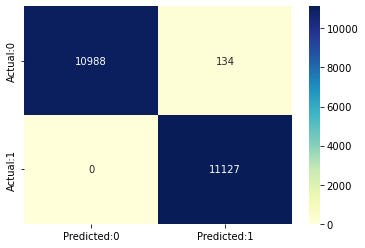

In [37]:
#confusion matrix heatmap
cm=confusion_matrix(y_test,y_pred)
cm
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
#plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

# TEST DATA

In [38]:
test=pd.read_csv('test_Wf7sxXF.csv')
test

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,52341,2022-03-30,16,12,NaN,NaN,0,0,0,0,0,1,1,0,0,0,0,0
13180,52342,2022-03-30,12,8,NaN,2022-03-19,1,0,0,0,0,1,0,0,0,0,0,0
13181,52343,2022-03-30,14,14,3.0,2021-08-15,0,0,1,0,0,0,1,0,0,0,0,0
13182,52344,2022-03-30,14,10,NaN,NaN,0,0,0,0,0,0,1,0,0,0,1,0


# filling null values and cleaning of data

In [39]:
test['products_purchased']=test['products_purchased'].fillna(test.products_purchased.mean())

In [40]:
test['products_purchased']=test['products_purchased'].astype('int64')

In [41]:
test=test.drop('signup_date',axis=1)

In [42]:
test['created_at'] = pd.to_datetime(test['created_at'], format = '%Y-%m-%dT', errors = 'coerce')

In [43]:
test['created_at_year'] = test['created_at'].dt.year
test['created_at_month'] = test['created_at'].dt.month
test['created_at_days'] = test['created_at'].dt.day

In [44]:
test=test.drop('created_at',axis=1)

In [45]:
test

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,created_at_year,created_at_month,created_at_days
0,39162,2,2,2,1,1,0,0,0,1,0,0,0,0,1,0,2022,1,1
1,39163,4,7,3,1,0,0,0,0,0,0,1,0,0,0,0,2022,1,1
2,39164,8,7,2,0,0,0,0,1,1,0,0,0,0,0,0,2022,1,1
3,39165,9,8,2,0,0,0,0,1,1,1,0,0,0,2,0,2022,1,1
4,39166,4,5,2,1,0,0,0,0,0,0,0,0,0,0,0,2022,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,52341,16,12,2,0,0,0,0,0,1,1,0,0,0,0,0,2022,3,30
13180,52342,12,8,2,1,0,0,0,0,1,0,0,0,0,0,0,2022,3,30
13181,52343,14,14,3,0,0,1,0,0,0,1,0,0,0,0,0,2022,3,30
13182,52344,14,10,2,0,0,0,0,0,0,1,0,0,0,1,0,2022,3,30


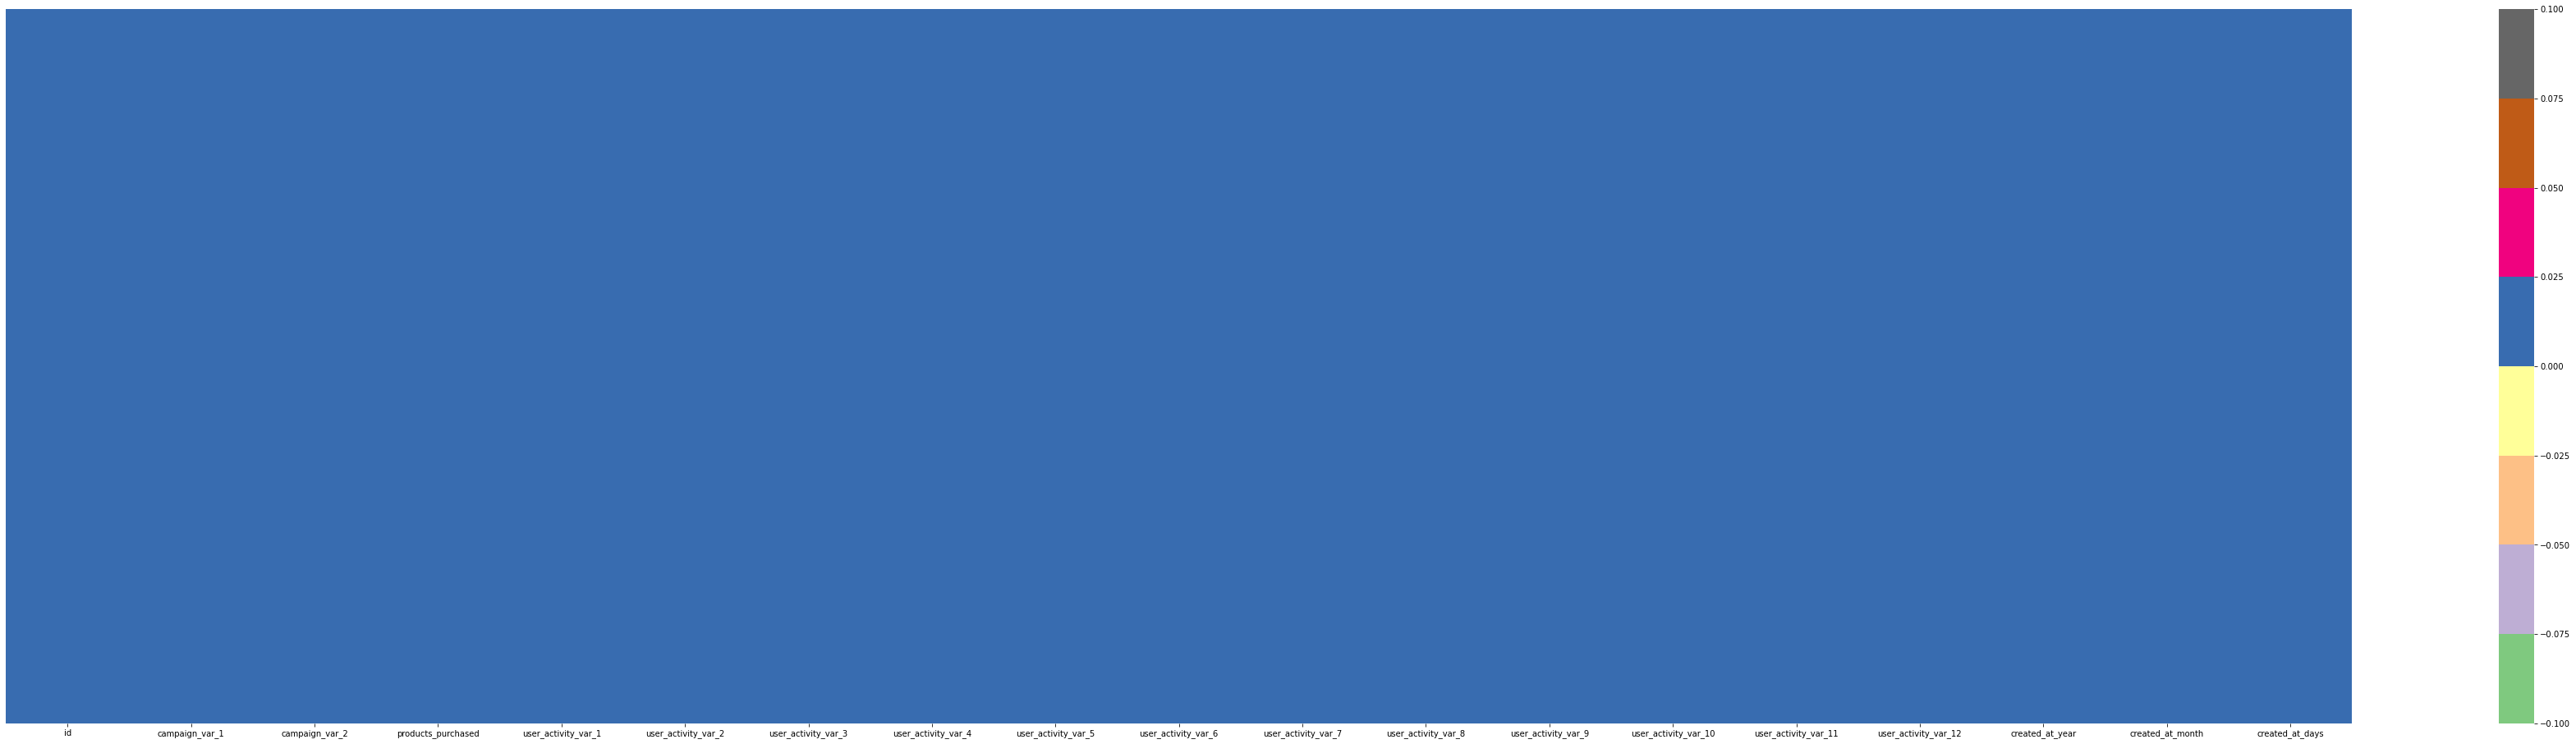

In [46]:
plt.figure(figsize=(64,16))
sns.heatmap(test.isnull(),yticklabels=False,cmap='Accent')
plt.show()

load pickle file 


In [47]:
model= pickle.load(open('D2C.pkl','rb'))

In [48]:
#predict the target value
test_pred=rfc.predict(test)

In [49]:
test_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

# submission data

In [50]:
submission = pd.DataFrame({'id':test['id'],'buy':test_pred})

In [51]:
submission

,id,buy
0,39162,1
1,39163,0
2,39164,0
3,39165,1
4,39166,0
...,...,...
13179,52341,0
13180,52342,0
13181,52343,0
13182,52344,0


# create csv file of prediction


In [52]:
submission.to_csv('final_submission.csv', index=False)